In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/hedvig/data/processed/n_claims_process.csv")
data.head()

,owner_age,owner_gender,geo_zone,vehicle_classification,vehicle_age,duration,n_claims,claim_cost
0,0,M,1,4,12,0.175342,0,0
1,4,M,3,6,9,0.000000,0,0
2,5,K,3,3,18,0.454795,0,0
3,5,K,4,1,25,0.172603,0,0
4,6,K,2,1,26,0.180822,0,0


In [3]:
data = data.drop_duplicates()
data.shape

(63350, 8)

In [4]:
data['owner_gender'] = data['owner_gender'].map({'M': 1, 'K': 0})

<ipython-input-4-f96ffa38a54f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['owner_gender'] = data['owner_gender'].map({'M': 1, 'K': 0})


In [5]:
data.dtypes

,0
owner_age,int64
owner_gender,int64
geo_zone,int64
vehicle_classification,int64
vehicle_age,int64
duration,float64
n_claims,int64
claim_cost,int64


<ipython-input-15-c0ee0943a2ce>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='skyblue', ax=axes[i])
<ipython-input-15-c0ee0943a2ce>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='skyblue', ax=axes[i])
<ipython-input-15-c0ee0943a2ce>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='skyblue', ax=axes[i])
<ipython-input-15-c0ee0943a2ce>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column

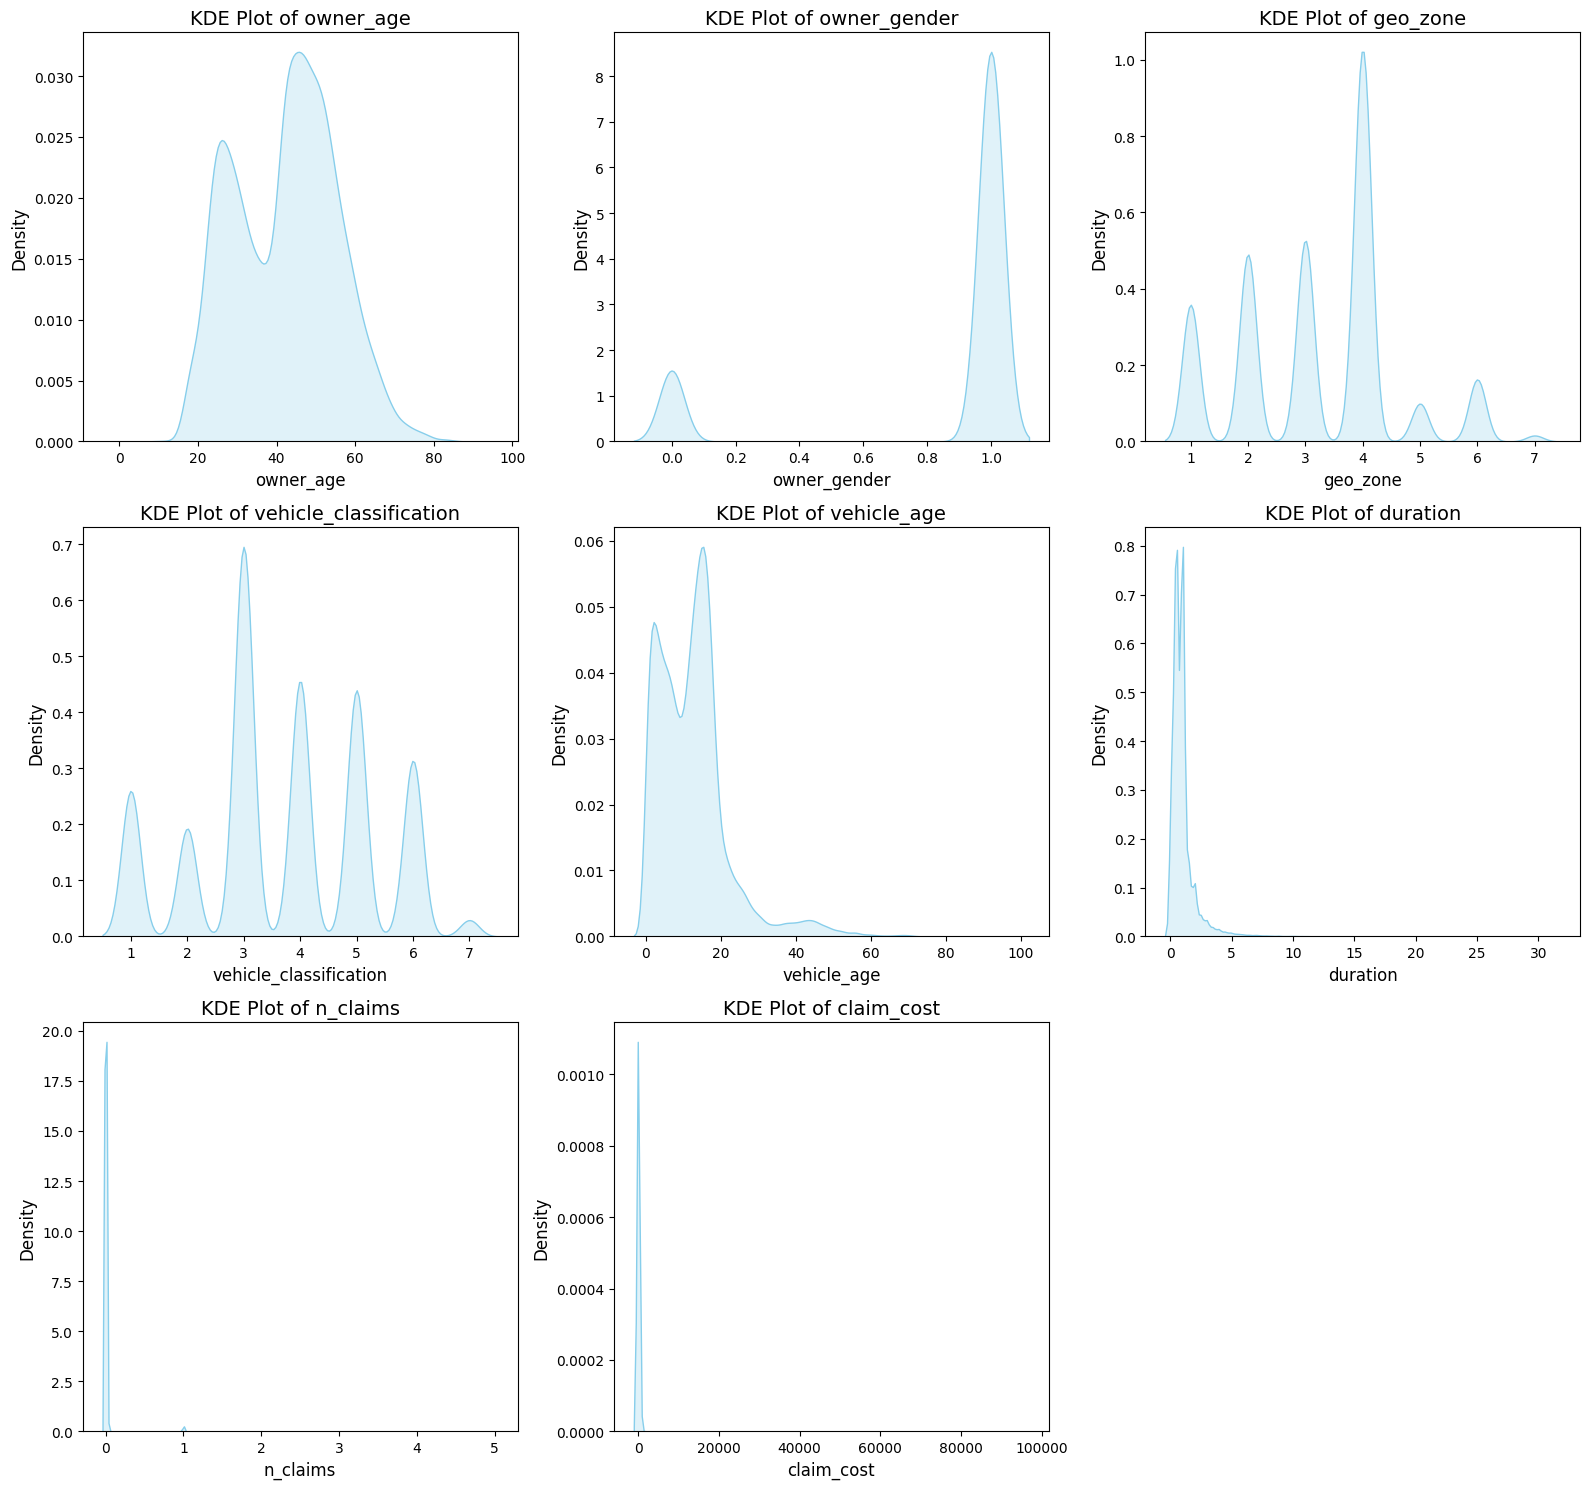

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for subplots
n_cols = 3  # Number of plots per row
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through numeric columns and plot KDE
for i, column in enumerate(numeric_columns):
    sns.kdeplot(data[column], shade=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'KDE Plot of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



In [6]:
data.head()

,owner_age,owner_gender,geo_zone,vehicle_classification,vehicle_age,duration,n_claims,claim_cost
0,0,1,1,4,12,0.175342,0,0
1,4,1,3,6,9,0.000000,0,0
2,5,0,3,3,18,0.454795,0,0
3,5,0,4,1,25,0.172603,0,0
4,6,0,2,1,26,0.180822,0,0


In [7]:
print(data.shape)
data = data[data['vehicle_age'] >= data['duration']]
print(data.shape)

(63350, 8)
(60191, 8)


In [8]:
invalid_cases = data[(data['duration'] == 0) & (data['n_claims'] > 0)]

# Set duration to 1 for these invalid cases
data.loc[invalid_cases.index, 'duration'] = 1

# Verify the changes
print("Updated invalid cases:")
print(data.loc[invalid_cases.index])


Updated invalid cases:
       owner_age  owner_gender  geo_zone  vehicle_classification  vehicle_age  \
3430          22             1         4                       6            9   
4241          23             1         3                       4           21   
15950         31             1         1                       3           14   
16118         31             1         2                       2            0   

       duration  n_claims  claim_cost  
3430        1.0         1       29329  
4241        1.0         1       12981  
15950       1.0         1       26560  
16118       1.0         1       31900  


In [9]:
data.head()

,owner_age,owner_gender,geo_zone,vehicle_classification,vehicle_age,duration,n_claims,claim_cost
0,0,1,1,4,12,0.175342,0,0
1,4,1,3,6,9,0.000000,0,0
2,5,0,3,3,18,0.454795,0,0
3,5,0,4,1,25,0.172603,0,0
4,6,0,2,1,26,0.180822,0,0


In [10]:
data['claim_frequency'] = data['n_claims'] / data['duration']

In [11]:
data.isna().sum()

,0
owner_age,0
owner_gender,0
geo_zone,0
vehicle_classification,0
vehicle_age,0
duration,0
n_claims,0
claim_cost,0
claim_frequency,2003


In [12]:
temp = data[data['duration'] == 0]
temp.shape

(2003, 9)

In [13]:
data['claim_frequency'].fillna(0, inplace=True)
data.isna().sum()

<ipython-input-13-919dbde1ee0c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['claim_frequency'].fillna(0, inplace=True)


,0
owner_age,0
owner_gender,0
geo_zone,0
vehicle_classification,0
vehicle_age,0
duration,0
n_claims,0
claim_cost,0
claim_frequency,0


In [14]:
data.dtypes

,0
owner_age,int64
owner_gender,int64
geo_zone,int64
vehicle_classification,int64
vehicle_age,int64
duration,float64
n_claims,int64
claim_cost,int64
claim_frequency,float64


In [15]:
data.head(50)

,owner_age,owner_gender,geo_zone,vehicle_classification,vehicle_age,duration,n_claims,claim_cost,claim_frequency
0,0,1,1,4,12,0.175342,0,0,0.0
1,4,1,3,6,9,0.000000,0,0,0.0
2,5,0,3,3,18,0.454795,0,0,0.0
3,5,0,4,1,25,0.172603,0,0,0.0
4,6,0,2,1,26,0.180822,0,0,0.0
5,9,0,3,3,8,0.542466,0,0,0.0
6,9,0,4,3,6,0.000000,0,0,0.0
7,9,1,4,4,20,0.504110,0,0,0.0
8,10,1,2,3,16,0.150685,0,0,0.0
9,10,1,4,2,17,0.523288,0,0,0.0


In [16]:
data.tail(50)

,owner_age,owner_gender,geo_zone,vehicle_classification,vehicle_age,duration,n_claims,claim_cost,claim_frequency
64498,81,0,4,1,37,0.663014,0,0,0.0
64499,81,0,4,3,15,0.498630,0,0,0.0
64500,81,0,4,3,15,0.501370,0,0,0.0
64501,81,1,2,6,12,0.758904,0,0,0.0
64502,81,1,4,2,18,1.000000,0,0,0.0
64503,81,1,6,1,48,0.939726,0,0,0.0
64504,82,0,4,1,38,1.000000,0,0,0.0
64505,82,0,4,3,16,0.479452,0,0,0.0
64506,82,1,2,6,13,1.002740,0,0,0.0
64507,82,1,3,1,19,1.008219,0,0,0.0


In [17]:
data['claim_frequency'].value_counts()

,count
claim_frequency,
0.000000,59624
1.000000,28
1.994535,9
2.005495,7
2.027776,6
...,...
2.765150,1
0.422943,1
4.562502,1


In [18]:
data['claim_frequency'] = data['claim_frequency'].round()
data['claim_frequency'].value_counts()

,count
claim_frequency,
0.0,59697
1.0,216
2.0,131
3.0,54
4.0,30
5.0,22
6.0,8
9.0,7
8.0,5


In [19]:
data.corr()

,owner_age,owner_gender,geo_zone,vehicle_classification,vehicle_age,duration,n_claims,claim_cost,claim_frequency
owner_age,1.000000,0.080786,0.070512,-0.092732,0.085622,0.115440,-0.056977,-0.048824,-0.035444
owner_gender,0.080786,1.000000,0.000293,0.005838,0.066936,0.095164,0.018884,0.014727,0.009411
geo_zone,0.070512,0.000293,1.000000,0.029776,0.064816,0.081642,-0.042090,-0.036891,-0.022620
vehicle_classification,-0.092732,0.005838,0.029776,1.000000,-0.262753,0.062232,0.028013,0.026871,0.009703
vehicle_age,0.085622,0.066936,0.064816,-0.262753,1.000000,0.029638,-0.041184,-0.041110,-0.022247
duration,0.115440,0.095164,0.081642,0.062232,0.029638,1.000000,0.018685,-0.000679,-0.022176
n_claims,-0.056977,0.018884,-0.042090,0.028013,-0.041184,0.018685,1.000000,0.663753,0.423405
claim_cost,-0.048824,0.014727,-0.036891,0.026871,-0.041110,-0.000679,0.663753,1.000000,0.330259
claim_frequency,-0.035444,0.009411,-0.022620,0.009703,-0.022247,-0.022176,0.423405,0.330259,1.000000


In [20]:
from sklearn.model_selection import train_test_split
features = ['owner_age', 'owner_gender', 'geo_zone', 'vehicle_classification', 'vehicle_age']
X = data[features]
y = data['claim_frequency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model MSE: {mse_rf}")
print(f"Random Forest Model R-squared: {r2_rf}")

Random Forest Model MSE: 0.1711736740506692
Random Forest Model R-squared: -0.41659740426527536


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.12049211460460774
R-squared: 0.002832545775726447


In [24]:
data.head()

,owner_age,owner_gender,geo_zone,vehicle_classification,vehicle_age,duration,n_claims,claim_cost,claim_frequency
0,0,1,1,4,12,0.175342,0,0,0.0
1,4,1,3,6,9,0.000000,0,0,0.0
2,5,0,3,3,18,0.454795,0,0,0.0
3,5,0,4,1,25,0.172603,0,0,0.0
4,6,0,2,1,26,0.180822,0,0,0.0


In [25]:
data['claim_frequency'].value_counts()

,count
claim_frequency,
0.0,59697
1.0,216
2.0,131
3.0,54
4.0,30
5.0,22
6.0,8
9.0,7
8.0,5


In [26]:
data.to_csv("pretraining_data.csv")